# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import math

## importing dataset

In [2]:
dataset = pd.read_csv('Table - IN_Table.csv.csv')
dataset.describe();

In [3]:
print(dataset)

            IN1       IN2       IN3       IN4       IN5      Out1      Out2
0      0.077744  0.795565 -0.665503  0.879321  0.134419 -0.122686  0.123661
1      0.080313  0.824595 -0.655447  0.875636  0.134941 -0.122686  0.123661
2      0.087355  0.776258 -0.650550  0.884105  0.132452 -0.026857  0.123661
3      0.091774  0.739149 -0.644934  0.892043  0.131287 -0.026857  0.251010
4      0.091166  0.761332 -0.648654  0.892752  0.136788 -0.026857  0.251010
...         ...       ...       ...       ...       ...       ...       ...
14396 -2.371841 -1.399878 -2.594168 -0.861832 -1.607387 -2.039274 -1.531870
14397 -2.378745 -1.407683 -2.601522 -0.871577 -1.604817 -2.039274 -1.531870
14398 -2.385070 -1.388787 -2.606594 -0.880330 -1.579605 -1.943445 -1.659219
14399 -2.386119 -1.372492 -2.615738 -0.886744 -1.556761 -1.943445 -1.659219
14400 -2.382557 -1.357018 -2.612316 -0.888799 -1.535844 -1.943445 -1.659219

[14401 rows x 7 columns]


In [4]:
dataset.dropna() 

,IN1,IN2,IN3,IN4,IN5,Out1,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857,0.251010
...,...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445,-1.659219


In [5]:
def outlier(dataset):
    for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)
        median = st.median(dataset[column])
        std_dev = np.std(dataset[column])
        lower_bound = median - 3*std_dev
        upper_bound = median + 3*std_dev
        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset
dataset_c = outlier(dataset)
dataset_c.dropna(inplace=True)
dataset_c.describe()

C:\Users\Abhishek Gonnade\AppData\Local\Temp\ipykernel_10204\2285577944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = dataset[column].astype(float)


,IN1,IN2,IN3,IN4,IN5,Out1,Out2
count,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000
mean,0.012522,0.020190,0.008128,0.025368,-0.010260,-0.001105,-0.006577
std,0.985636,0.995023,0.984860,0.991940,0.970358,0.923232,0.883825
min,-2.634673,-2.422492,-2.631096,-2.354538,-1.934470,-2.805909,-2.805356
25%,-0.286878,-0.918594,-0.292456,-0.877885,-0.709796,-0.506004,-0.513082
50%,0.366122,0.621044,0.225352,0.515633,-0.042572,0.164802,-0.003688
75%,0.680357,0.763112,0.400686,0.887366,0.566638,0.643949,0.505707
max,1.530461,1.939639,1.844610,1.654608,2.957842,3.135513,2.797981


## Removing outliers

In [6]:
import seaborn as sns
#sns.displot(dataset)

<Axes: >

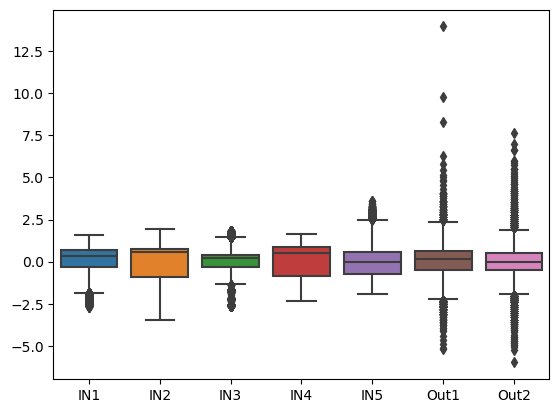

In [7]:
sns.boxplot(dataset)

In [8]:
def outliers(dataset):
    for columns in dataset.columns:
        q1 = dataset[columns].quantile(0.25)
        q3 = dataset[columns].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        #capping
        dataset_c = dataset.copy()
        dataset_c.loc[(dataset_c[columns] > upper_limit),columns] = upper_limit
        dataset_c.loc[(dataset_c[columns] < lower_limit),columns] = lower_limit
    return dataset_c

    
#dataset_c = outliers(dataset)
#dataset_c.describe()

# Error Detail

In [9]:
def result(y_test,y_pred,k):
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  from math import pi,log
  
  r2 = r2_score(y_test,y_pred)
  n = len(y_test)
  SSE= mean_squared_error(y_test,y_pred)
  MAE = mean_absolute_error(y_test,y_pred)
  aic = 2*k + n*log(2*math.pi) + n*log(SSE/n) + n
  bic = k*log(n) + n*math.log(2*pi) + n*log(SSE/n) + n
  print('R2_score :',r2)
  print('SSE :',SSE)
  print('MAE :',MAE)
  print('aic :',aic)
  print('bic :',bic)

# KNN

In [10]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
y_pred_knn = knn.predict(X_test)

In [14]:
result(y_test,y_pred_knn,5)

R2_score : 0.44369784709120164
SSE : 0.41817931878366404
MAE : 0.4296897620526729
aic : -16730.67484680793
bic : -16700.982619052105


# Polynomial Regression

In [15]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred_poly = poly_reg.predict(X_test)

In [20]:
result(y_test,y_pred_poly,5)

R2_score : 0.4220419239547242
SSE : 0.4344583483317093
MAE : 0.480950488268879
aic : -16623.628988421304
bic : -16593.936760665478


# Linear Regression

In [21]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_lin = lin_reg.predict(X_test)

In [25]:
result(y_test,y_pred_lin,5)

R2_score : 0.2548955774052091
SSE : 0.5601043573787273
MAE : 0.5626483628073078
aic : -15911.602407676663
bic : -15881.910179920837


# Early Stopping Funtion

In [26]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [27]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = [] 

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()
    


# Neural Network

In [28]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6424 - mae: 0
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6418 - mae: 0.5966
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.5818 - mae: 0.5
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5818 - mae: 0.5717
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.5800 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5800 - mae: 0.5697
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.5540 - mae: 0.5
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5541 - mae: 0.5606
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.5422 - mae: 0.5
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5423 - mae: 0.5529
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.5465 - mae: 0.5
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465 - mae: 0.5542
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.5376 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4181 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4182 - mae: 0.4772
Epoch 39/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4072 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4076 - mae: 0.4731
Epoch 40/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.4070 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4072 - mae: 0.4720
Epoch 41/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.3979 - mae: 0.4
Epoch 40: R2 Score = 0.46276719963117907
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3980 - mae: 0.4696
Epoch 42/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.4156 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4156 - mae: 0.4757
Epoch 43/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.4061 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4061 - mae: 0.4720
Epoch 44/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.4083 - mae:

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.3475 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3474 - mae: 0.4308
Epoch 76/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.3225 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3231 - mae: 0.4202
Epoch 77/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.3387 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3390 - mae: 0.4253
Epoch 78/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3349 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3350 - mae: 0.4242
Epoch 79/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3362 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3363 - mae: 0.4231
Epoch 80/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.3357 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3357 - mae: 0.4277
Epoch 81/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.3330 - mae: 0.4
Epoch 80: R2 Score = 0.5079863137169

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.2866 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2870 - mae: 0.3946
Epoch 113/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.2990 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2991 - mae: 0.3970
Epoch 114/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.3015 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3015 - mae: 0.4033
Epoch 115/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.2904 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2906 - mae: 0.3919
Epoch 116/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.3025 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3025 - mae: 0.4009
Epoch 117/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.2937 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2937 - mae: 0.3945
Epoch 118/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.3110 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2743 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2744 - mae: 0.3788
Epoch 150/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.2749 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2749 - mae: 0.3802
Epoch 151/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.2721 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2721 - mae: 0.3784
Epoch 152/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.2601 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2605 - mae: 0.3708
Epoch 153/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2678 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2678 - mae: 0.3747
Epoch 154/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.2755 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2755 - mae: 0.3827
Epoch 155/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2744 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.2470 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2472 - mae: 0.3568
Epoch 187/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.2444 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2447 - mae: 0.3587
Epoch 188/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.2390 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2392 - mae: 0.3515
Epoch 189/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.2453 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2453 - mae: 0.3591
Epoch 190/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.2493 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2493 - mae: 0.3592
Epoch 191/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2520 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2519 - mae: 0.3616
Epoch 192/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.2424 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.2367 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2368 - mae: 0.3508
Epoch 224/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.2421 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2420 - mae: 0.3525
Epoch 225/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.2297 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2299 - mae: 0.3433
Epoch 226/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2289 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2292 - mae: 0.3443
Epoch 227/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.2322 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2323 - mae: 0.3441
Epoch 228/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.2409 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2408 - mae: 0.3513
Epoch 229/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2347 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.2107 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2108 - mae: 0.3302
Epoch 261/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2329 - mae: 0.
Epoch 260: R2 Score = 0.5210906621898048
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2328 - mae: 0.3413
Epoch 262/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.2212 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2213 - mae: 0.3391
Epoch 263/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.2162 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2164 - mae: 0.3351
Epoch 264/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2193 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2194 - mae: 0.3364
Epoch 265/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.2215 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2215 - mae: 0.3370
Epoch 266/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.217

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.2026 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2028 - mae: 0.3220
Epoch 298/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.2171 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2172 - mae: 0.3348
Epoch 299/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2175 - mae: 0.
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2174 - mae: 0.3335
Epoch 300/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.2110 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2110 - mae: 0.3319


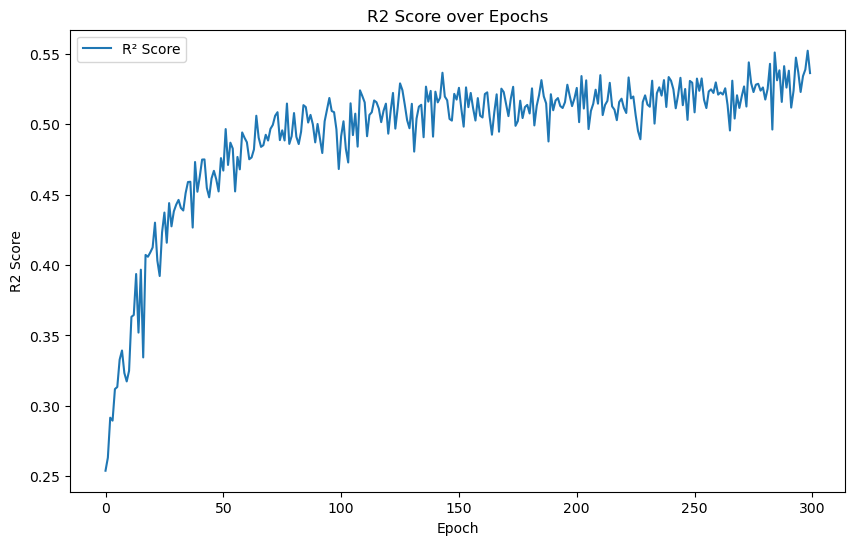

In [29]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


<Axes: >

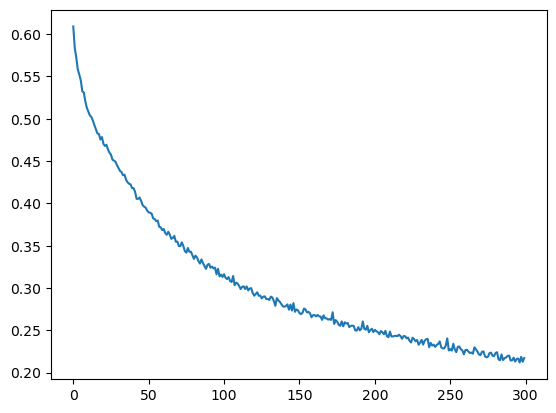

In [30]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

In [31]:
y_pred_ann = ann.predict(X_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


In [32]:
result(y_test,y_pred_ann,5)

R2_score : 0.5363793921949223
SSE : 0.3485094367013538
MAE : 0.4247541439141513
aic : -17241.507651750184
bic : -17211.815423994358


In [33]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,505 (5.77 MB)

 Trainable params: 504,501 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,009,004 (3.85 MB)

# LSTM

Epoch 1/1000


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   - loss: 0.6515 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6513 - mae: 0.6049
Epoch 2/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.6379 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6378 - mae: 0.5964
Epoch 3/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6430 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6424 - mae: 0.6047
Epoch 4/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6466 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6463 - mae: 0.5993
Epoch 5/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6248 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6248 - mae: 0.5950
Epoch 6/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.6088 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6090 - mae: 0.5848
Epoch 7/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6009 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.5331 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5330 - mae: 0.5481
Epoch 39/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.5448 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5441 - mae: 0.5568
Epoch 40/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.5235 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5236 - mae: 0.5450
Epoch 41/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.5332 - mae: 0
Epoch 40: R2 Score = 0.33917930500509763
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5330 - mae: 0.5515
Epoch 42/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.5361 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5357 - mae: 0.5493
Epoch 43/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.5223 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5223 - mae: 0.5426
Epoch 44/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.5154 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4997 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4994 - mae: 0.5317
Epoch 76/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4766 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4767 - mae: 0.5164
Epoch 77/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4856 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4855 - mae: 0.5181
Epoch 78/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4770 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4773 - mae: 0.5167
Epoch 79/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4822 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4823 - mae: 0.5171
Epoch 80/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4793 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4794 - mae: 0.5155
Epoch 81/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4724 - mae: 0.5
Epoch 80: R2 Score = 0.398381

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4546 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4545 - mae: 0.5060
Epoch 113/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4449 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4450 - mae: 0.5041
Epoch 114/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4475 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4475 - mae: 0.5062
Epoch 115/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4449 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4449 - mae: 0.5010
Epoch 116/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4535 - mae: 
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4532 - mae: 0.5028
Epoch 117/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4410 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4413 - mae: 0.4976
Epoch 118/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4399 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4100 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4101 - mae: 0.4808
Epoch 150/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4215 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4213 - mae: 0.4832
Epoch 151/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4101 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4101 - mae: 0.4805
Epoch 152/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4028 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4031 - mae: 0.4801
Epoch 153/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4034 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4034 - mae: 0.4760
Epoch 154/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.4001 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4006 - mae: 0.4754
Epoch 155/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4114 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3660 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3668 - mae: 0.4546
Epoch 187/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3788 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3788 - mae: 0.4595
Epoch 188/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3708 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3712 - mae: 0.4603
Epoch 189/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3680 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3684 - mae: 0.4521
Epoch 190/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3718 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3721 - mae: 0.4560
Epoch 191/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3693 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3694 - mae: 0.4545
Epoch 192/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3799 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━

Epoch 223/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3639 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3637 - mae: 0.4483
Epoch 224/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3621 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3619 - mae: 0.4511
Epoch 225/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3435 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3436 - mae: 0.4378
Epoch 226/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3627 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3623 - mae: 0.4467
Epoch 227/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3495 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3495 - mae: 0.4392
Epoch 228/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3498 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3499 - mae: 0.4417
Epoch 229/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3430 - mae: 0.4
351/351

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3190 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3197 - mae: 0.4255
Epoch 261/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3393 - mae: 0.4
Epoch 260: R2 Score = 0.5547968553624223
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3388 - mae: 0.4354
Epoch 262/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3410 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3409 - mae: 0.4364
Epoch 263/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3260 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3266 - mae: 0.4261
Epoch 264/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3225 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3228 - mae: 0.4236
Epoch 265/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3268 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3272 - mae: 0.4257
Epoch 266/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3013 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3014 - mae: 0.4076
Epoch 298/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3141 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3141 - mae: 0.4179
Epoch 299/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3124 - mae: 
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3124 - mae: 0.4171
Epoch 300/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3159 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3161 - mae: 0.4164
Epoch 301/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3122 - mae: 0.
Epoch 300: R2 Score = 0.5373279758300038
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3123 - mae: 0.4167
Epoch 302/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3179 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3178 - mae: 0.4220
Epoch 303/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3050 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3049 - mae: 0.4073
Epoch 335/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2965 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2967 - mae: 0.4060
Epoch 336/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3018 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3019 - mae: 0.4103
Epoch 337/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.3061 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3060 - mae: 0.4097
Epoch 338/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2977 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2978 - mae: 0.4071
Epoch 339/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2990 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2992 - mae: 0.4079
Epoch 340/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2938 - mae: 0.4
351/351 ━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2900 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2900 - mae: 0.3980
Epoch 372/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2883 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2884 - mae: 0.3995
Epoch 373/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.2926 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2927 - mae: 0.4006
Epoch 374/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2935 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2934 - mae: 0.4008
Epoch 375/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2939 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2939 - mae: 0.4023
Epoch 376/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2853 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2853 - mae: 0.4004
Epoch 377/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2886 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━

Epoch 408/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2928 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2926 - mae: 0.4029
Epoch 409/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2818 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2821 - mae: 0.3912
Epoch 410/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2831 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2832 - mae: 0.3957
Epoch 411/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2757 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2761 - mae: 0.3896
Epoch 412/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2713 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2716 - mae: 0.3886
Epoch 413/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2792 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2792 - mae: 0.3925
Epoch 414/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2786 - mae: 0
351/351 ━

Epoch 445/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2570 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2574 - mae: 0.3763
Epoch 446/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2715 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2715 - mae: 0.3877
Epoch 447/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2759 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2758 - mae: 0.3908
Epoch 448/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2675 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2677 - mae: 0.3861
Epoch 449/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2681 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2681 - mae: 0.3863
Epoch 450/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2771 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2770 - mae: 0.3892
Epoch 451/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2662 - mae: 0.3
351/351

Epoch 482/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2561 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2562 - mae: 0.3729
Epoch 483/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2653 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2653 - mae: 0.3817
Epoch 484/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2729 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2727 - mae: 0.3857
Epoch 485/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2583 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2584 - mae: 0.3779
Epoch 486/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2653 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2654 - mae: 0.3837
Epoch 487/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2614 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2614 - mae: 0.3803
Epoch 488/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2636 - mae: 0
351/351 ━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2607 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2606 - mae: 0.3789
Epoch 520/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2483 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2484 - mae: 0.3717
Epoch 521/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2559 - mae: 0.3
Epoch 520: R2 Score = 0.5767076201481673
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2558 - mae: 0.3770
Epoch 522/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2595 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2595 - mae: 0.3774
Epoch 523/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2465 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2468 - mae: 0.3701
Epoch 524/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2654 - mae: 
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2652 - mae: 0.3770
Epoch 525/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2565 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2566 - mae: 0.3752
Epoch 557/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2550 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2550 - mae: 0.3734
Epoch 558/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2531 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2530 - mae: 0.3718
Epoch 559/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2509 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2509 - mae: 0.3725
Epoch 560/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2504 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2505 - mae: 0.3706
Epoch 561/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2458 - mae: 0.3
Epoch 560: R2 Score = 0.6036768092462907
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2458 - mae: 0.3654
Epoch 562/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss:

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2572 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2570 - mae: 0.3739
Epoch 594/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2379 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2379 - mae: 0.3622
Epoch 595/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2426 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2429 - mae: 0.3680
Epoch 596/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2420 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2421 - mae: 0.3651
Epoch 597/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2464 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2464 - mae: 0.3686
Epoch 598/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2380 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2380 - mae: 0.3624
Epoch 599/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2452 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━

Epoch 630/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2347 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2350 - mae: 0.3575
Epoch 631/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2350 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2352 - mae: 0.3601
Epoch 632/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2442 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2442 - mae: 0.3631
Epoch 633/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2400 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2402 - mae: 0.3628
Epoch 634/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2349 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2350 - mae: 0.3578
Epoch 635/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2470 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2469 - mae: 0.3693
Epoch 636/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2397 - mae: 0.3
351/351

Epoch 667/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2449 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2449 - mae: 0.3604
Epoch 668/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2256 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2257 - mae: 0.3529
Epoch 669/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2240 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2244 - mae: 0.3511
Epoch 670/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2309 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2309 - mae: 0.3540
Epoch 671/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2386 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2384 - mae: 0.3592
Epoch 672/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2487 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2482 - mae: 0.3651
Epoch 673/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2339 - mae: 0.3
351/351 ━━

Epoch 704/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2279 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2280 - mae: 0.3527
Epoch 705/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2368 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2368 - mae: 0.3562
Epoch 706/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2322 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2322 - mae: 0.3526
Epoch 707/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2282 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2282 - mae: 0.3512
Epoch 708/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2319 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2318 - mae: 0.3532
Epoch 709/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2413 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2408 - mae: 0.3585
Epoch 710/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2348 - mae: 0
351/351 ━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2188 - mae: 0.
Epoch 740: R2 Score = 0.6014423077247055
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2189 - mae: 0.3423
Epoch 742/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2194 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2198 - mae: 0.3477
Epoch 743/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2146 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2150 - mae: 0.3458
Epoch 744/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2268 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2268 - mae: 0.3546
Epoch 745/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2378 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2377 - mae: 0.3561
Epoch 746/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2173 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2174 - mae: 0.3444
Epoch 747/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss:

Epoch 778/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2249 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2248 - mae: 0.3479
Epoch 779/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2211 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2210 - mae: 0.3479
Epoch 780/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2237 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2237 - mae: 0.3475
Epoch 781/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2234 - mae: 0.
Epoch 780: R2 Score = 0.6072477180790721
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2232 - mae: 0.3455
Epoch 782/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2183 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2186 - mae: 0.3432
Epoch 783/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2217 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2221 - mae: 0.3482
Epoch 784/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

Epoch 815/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2175 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2176 - mae: 0.3437
Epoch 816/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2131 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2131 - mae: 0.3406
Epoch 817/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2154 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2154 - mae: 0.3419
Epoch 818/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2204 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2206 - mae: 0.3466
Epoch 819/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2153 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2155 - mae: 0.3414
Epoch 820/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2102 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2103 - mae: 0.3388
Epoch 821/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2127 - mae: 0.
Epoch 820: R

Epoch 852/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2148 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2149 - mae: 0.3413
Epoch 853/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2106 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2109 - mae: 0.3380
Epoch 854/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2087 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2090 - mae: 0.3393
Epoch 855/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2297 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2295 - mae: 0.3519
Epoch 856/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2077 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2078 - mae: 0.3377
Epoch 857/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2016 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2017 - mae: 0.3323
Epoch 858/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2085 - mae: 0.3
351/35

Epoch 889/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2086 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2088 - mae: 0.3364
Epoch 890/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2140 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2140 - mae: 0.3398
Epoch 891/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2102 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2101 - mae: 0.3369
Epoch 892/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2065 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2066 - mae: 0.3357
Epoch 893/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2105 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2106 - mae: 0.3349
Epoch 894/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2046 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2048 - mae: 0.3323
Epoch 895/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2098 - mae: 0.3
351/35

Epoch 926/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2045 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2046 - mae: 0.3326
Epoch 927/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2047 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2049 - mae: 0.3336
Epoch 928/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2010 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2011 - mae: 0.3302
Epoch 929/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2039 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2040 - mae: 0.3352
Epoch 930/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2072 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2072 - mae: 0.3342
Epoch 931/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2086 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2085 - mae: 0.3358
Epoch 932/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2048 - mae: 0.3
351/351 

Epoch 963/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2112 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2109 - mae: 0.3369
Epoch 964/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1999 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2002 - mae: 0.3309
Epoch 965/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2051 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2052 - mae: 0.3344
Epoch 966/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.2038 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2038 - mae: 0.3356
Epoch 967/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 0.1969 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1971 - mae: 0.3274
Epoch 968/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2019 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2020 - mae: 0.3305
Epoch 969/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2060 - mae: 0.3
351/351 ━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2005 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2005 - mae: 0.3280


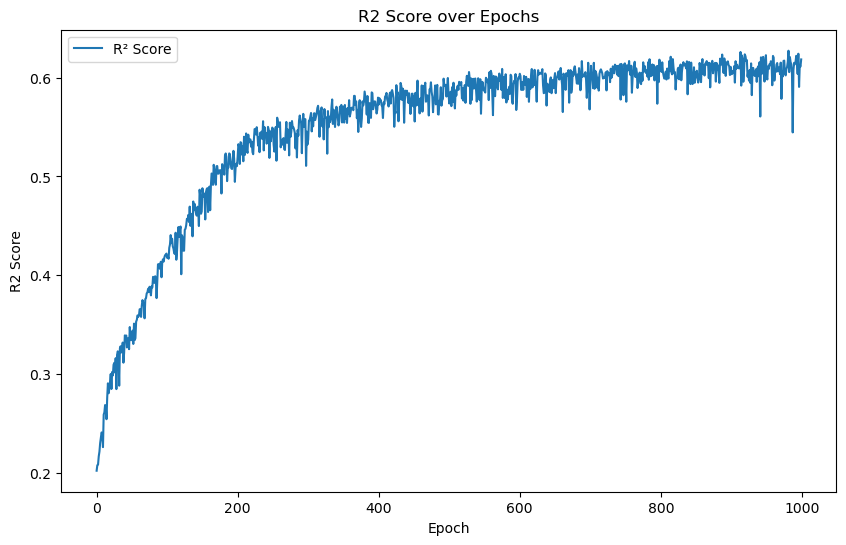

In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = dataset_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = dataset_c.loc[:, 'Out2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


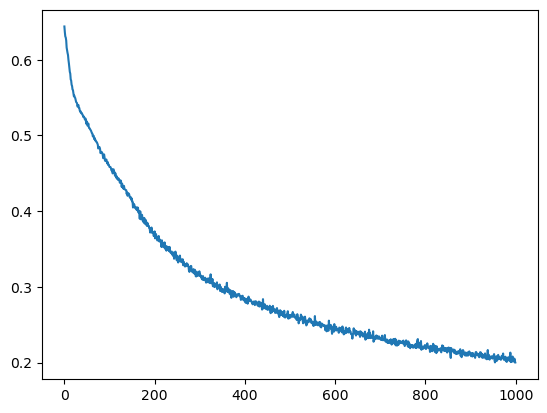

In [35]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

In [36]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R2_score : 0.6183679814915038
SSE : 0.2868775838659774
MAE : 0.3822884310087084
aic : -17786.99869739277
bic : -17757.306469636944


In [37]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

# LSTM 2

In [38]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out2']]

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 - 1s - 6ms/step - loss: 0.2736
Epoch 1/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0696
Epoch 2/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0204
Epoch 3/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0199
Epoch 4/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0197
Epoch 5/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0195
Epoch 6/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0206
Epoch 7/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0190
Epoch 8/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0194
Epoch 9/1000
88/

Epoch 44/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0198
Epoch 45/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0189
Epoch 46/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192
Epoch 47/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 48/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 49/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 50/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 51/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189
Epoch 52/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 88/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 89/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 90/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0185
Epoch 91/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0194
Epoch 92/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0194
Epoch 93/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0188
Epoch 94/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189
Epoch 95/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 131/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 132/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0180
Epoch 133/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 134/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184
Epoch 135/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 136/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 137/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 138/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 

Epoch 173/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175
Epoch 174/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 175/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 176/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 177/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174
Epoch 178/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 179/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 180/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 181/1000
88/88 ━━━━━━━━

Epoch 216/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174
Epoch 217/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0174
Epoch 218/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0171
Epoch 219/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0175
Epoch 220/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0167
Epoch 221/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
Epoch 220: R2 Score = 0.32372761906364267
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 222/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 223/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss

Epoch 259/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 260/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 261/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
Epoch 260: R2 Score = 0.340897876360406
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 262/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171
Epoch 263/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0165
Epoch 264/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167
Epoch 265/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 266/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 

176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0166
Epoch 302/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - los
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0164
Epoch 303/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0162
Epoch 304/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0163
Epoch 305/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0160
Epoch 306/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160
Epoch 307/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0167
Epoch 308/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168
Epoch 309/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8m

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160
Epoch 345/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0156
Epoch 346/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162
Epoch 347/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158
Epoch 348/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0155
Epoch 349/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157
Epoch 350/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157
Epoch 351/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157
Epoch 352/1000
88/88 ━━━━━━━━━━━━━━━━━━

Epoch 387/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153
Epoch 388/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0150
Epoch 389/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0151
Epoch 390/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0148
Epoch 391/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150
Epoch 392/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0156
Epoch 393/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158
Epoch 394/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150
Epoch 395/1000
88/88 ━━━━━━━━━

Epoch 430/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151
Epoch 431/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148
Epoch 432/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143
Epoch 433/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145
Epoch 434/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147
Epoch 435/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146
Epoch 436/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0138
Epoch 437/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141
Epoch 438/1000
88/88 ━━━━━━━━━━━━

Epoch 473/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143
Epoch 474/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131
Epoch 475/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141
Epoch 476/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0137
Epoch 477/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0140
Epoch 478/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0138
Epoch 479/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139
Epoch 480/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0135
Epoch 481/1000
88/88 ━━━━━━━━━━━━━━

Epoch 516/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131
Epoch 517/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0133
Epoch 518/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132
Epoch 519/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132
Epoch 520/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135
Epoch 521/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
Epoch 520: R2 Score = 0.4820099861684689
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0133
Epoch 522/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134
Epoch 523/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

Epoch 559/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123
Epoch 560/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130
Epoch 561/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
Epoch 560: R2 Score = 0.47895417350842173
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0127
Epoch 562/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0128
Epoch 563/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124
Epoch 564/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0128
Epoch 565/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130
Epoch 566/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0

Epoch 602/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122
Epoch 603/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122
Epoch 604/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121
Epoch 605/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124
Epoch 606/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121
Epoch 607/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124
Epoch 608/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121
Epoch 609/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118
Epoch 610/1000
88/88 ━━━━━━━━━

Epoch 645/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114
Epoch 646/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122
Epoch 647/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116
Epoch 648/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115
Epoch 649/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118
Epoch 650/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113
Epoch 651/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123
Epoch 652/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119
Epoch 653/1000
88/88 ━━━━━━━━━

Epoch 688/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121
Epoch 689/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114
Epoch 690/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0118
Epoch 691/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0116
Epoch 692/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116
Epoch 693/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113
Epoch 694/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109
Epoch 695/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114
Epoch 696/1000
88/88 ━━━━━━━━━━━━━━━━

Epoch 731/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106
Epoch 732/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114
Epoch 733/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110
Epoch 734/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112
Epoch 735/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108
Epoch 736/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115
Epoch 737/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106
Epoch 738/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0110
Epoch 739/1000
88/88 ━━━━━━━━━━━━━━━━━━━

Epoch 774/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109
Epoch 775/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105
Epoch 776/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107
Epoch 777/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107
Epoch 778/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0107
Epoch 779/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - los
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0105
Epoch 780/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107
Epoch 781/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
Epoch 780: R2 Score = 0.5356231111693448
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

Epoch 817/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101
Epoch 818/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105
Epoch 819/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103
Epoch 820/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108
Epoch 821/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
Epoch 820: R2 Score = 0.5115088781289617
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106
Epoch 822/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107
Epoch 823/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102
Epoch 824/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

Epoch 860/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099
Epoch 861/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
Epoch 860: R2 Score = 0.5244661745268147
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101
Epoch 862/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102
Epoch 863/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098
Epoch 864/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100
Epoch 865/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103
Epoch 866/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099
Epoch 867/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101
Epoch 903/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0098
Epoch 904/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098
Epoch 905/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0099
Epoch 906/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0100
Epoch 907/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0095
Epoch 908/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0101
Epoch 909/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096
Epoch 910/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

Epoch 945/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094
Epoch 946/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0097
Epoch 947/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss: 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093
Epoch 948/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096
Epoch 949/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0098
Epoch 950/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0097
Epoch 951/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098
Epoch 952/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093
Epoch 953/1000
88/88 ━━━━━━━━━━━━━

Epoch 988/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0094
Epoch 989/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091
Epoch 990/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095
Epoch 991/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092
Epoch 992/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0095
Epoch 993/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - loss
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096
Epoch 994/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091
Epoch 995/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091
Epoch 996/1000
88/88 ━━━━━━━━

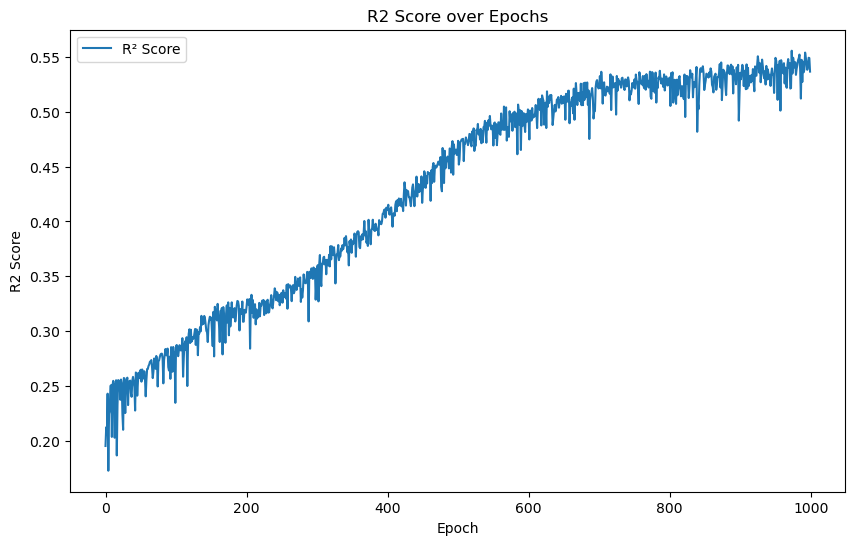

In [41]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [42]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2_score : 0.5365364854107115
SSE : 0.011096188009775302
MAE : 0.07638802863499938
aic : -26903.627149857064
bic : -26873.934922101238


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 256)              │         268,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 256)              │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,957,509 (15.10 MB)

 Trainable params: 1,319,169 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,638,340 (10.06 MB)

# PCA

In [44]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out2']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knnp = KNeighborsRegressor(n_neighbors = 3)
knnp.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred_knnp = knnp.predict(X_test)
result(y_test,y_pred_knnp,3)

R2_score : -0.6738905998510012
SSE : 1.2582845978646213
MAE : 0.870874062207817
aic : -13646.905997974882
bic : -13629.090661321388
